In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [88]:
df = pd.read_excel("./online_retail_II.xlsx")

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1048575 non-null  object        
 1   StockCode    1048575 non-null  object        
 2   Description  1044203 non-null  object        
 3   Quantity     1048575 non-null  int64         
 4   InvoiceDate  1048575 non-null  datetime64[ns]
 5   Price        1048575 non-null  float64       
 6   Customer ID  811893 non-null   float64       
 7   Country      1048575 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 64.0+ MB


There seem to be No customer IDs for some purchases so we have to remove them from our analysis.

In [90]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1048575.00,1048575,1048575.00,811893.00
mean,9.96,2010-12-27 19:44:22.911264768,4.63,15324.71
min,-74215.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-07-05 13:46:00,1.25,13971.00
50%,3.00,2010-12-06 09:58:00,2.10,15260.00
75%,10.00,2011-07-12 16:20:00,4.15,16795.00
max,74215.00,2011-12-04 13:15:00,38970.00,18287.00
std,133.52,NaN,122.80,1697.03


The minimum quantity and price are negative which is not possible so we will remove those

In [91]:
df.describe(include='O')  # Describes Object Datatypes

,Invoice,StockCode,Description,Country
count,1048575,1048575,1044203,1048575
unique,52961,5304,5692,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5781,5875,963819


In [92]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [93]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [94]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2011-12-02 15:10:00,4.95,12668.00,Germany
1046567,C580313,22419,LIPSTICK PEN RED,-6,2011-12-02 15:10:00,0.42,12668.00,Germany
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2011-12-02 15:10:00,2.55,12668.00,Germany
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2011-12-02 15:10:00,1.25,12668.00,Germany


In [95]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

 According to the Description of the data given in Kaggle, the Invoice contains a 6-digit numeric code. If it includes a 'C' at the front, it means cancellation. However, the dataset seems to have some other letters apart from 'C' and some with no description. Therefore, we have to remove all these including the cancellation ones for the analysis.

In [96]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

According to the description given in Kaggle, the stockcode is a 5-digit integral number uniquely assigned to each distinct product. There seem to be a lot of stock codes deviating from this so we have to delete all those that deviate.


NOTE : we allowed stockcodes with letters after integral code  as they represent different types of same product.

## Data Cleaning

In [97]:
clean_df = df.copy()

In [98]:
clean_df["Invoice"] = clean_df["Invoice"].astype("str")

mask = (
    clean_df["Invoice"].str.match("^\\d{6}$") == True   )            #Boolean masking


clean_df = clean_df[mask]

clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.00,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.00,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.00,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.00,United Kingdom


In [99]:
clean_df["StockCode"] = clean_df["StockCode"].astype("str")

mask = (
    (clean_df["StockCode"].str.match("^\\d{5}$") == True) | (clean_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True))

clean_df = clean_df[mask]

clean_df

<ipython-input-99-1554449032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["StockCode"] = clean_df["StockCode"].astype("str")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.00,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.00,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.00,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.00,United Kingdom


In [100]:
clean_df.dropna(subset=["Customer ID"], inplace=True)

<ipython-input-100-3602039131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(subset=["Customer ID"], inplace=True)


In [101]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,790500.00,790500,790500.00,790500.00
mean,13.25,2010-12-28 04:07:35.019279104,2.94,15338.08
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-07-04 12:34:00,1.25,13985.00
50%,5.00,2010-12-01 15:37:00,1.95,15281.00
75%,12.00,2011-07-18 16:59:00,3.75,16806.00
max,74215.00,2011-12-04 13:15:00,649.50,18287.00
std,113.55,NaN,4.30,1693.55


In [102]:
len(clean_df[clean_df["Price"] == 0])

61

In [103]:
clean_df = clean_df[clean_df["Price"] > 0.0]

In [104]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,790439.00,790439,790439.00,790439.00
mean,13.23,2010-12-28 04:06:48.841491712,2.94,15338.17
min,1.00,2009-12-01 07:45:00,0.03,12346.00
25%,2.00,2010-07-04 12:34:00,1.25,13985.00
50%,5.00,2010-12-01 15:37:00,1.95,15281.00
75%,12.00,2011-07-18 16:57:00,3.75,16806.00
max,74215.00,2011-12-04 13:15:00,649.50,18287.00
std,112.68,NaN,4.30,1693.52


In [105]:
len(clean_df)/len(df)

0.753822091886608

Dropped about 25% of records during cleaning

## Feature Engineering

In [106]:
clean_df["Moneyspent"] = clean_df["Quantity"] * clean_df["Price"]

clean_df

<ipython-input-106-3744872577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Moneyspent"] = clean_df["Quantity"] * clean_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Moneyspent
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.00,United Kingdom,16.50
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.00,United Kingdom,14.85
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.00,United Kingdom,4.95
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.00,United Kingdom,5.78


In [107]:
aggregated_df = clean_df.groupby(by="Customer ID", as_index=False).agg( MonetaryValue=("Moneyspent", "sum"),Frequency=("Invoice", "nunique"),LastInvoiceDate=("InvoiceDate", "max"))

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77352.96,3,2011-01-18 10:01:00
1,12347.00,5408.50,7,2011-10-31 12:25:00
2,12348.00,1658.40,5,2011-09-25 13:13:00
3,12349.00,3678.69,3,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [108]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days   # for calculating how many days before the customer has purchased lastly.

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77352.96,3,2011-01-18 10:01:00,320
1,12347.00,5408.50,7,2011-10-31 12:25:00,34
2,12348.00,1658.40,5,2011-09-25 13:13:00,70
3,12349.00,3678.69,3,2011-11-21 09:51:00,13
4,12350.00,294.40,1,2011-02-02 16:01:00,304


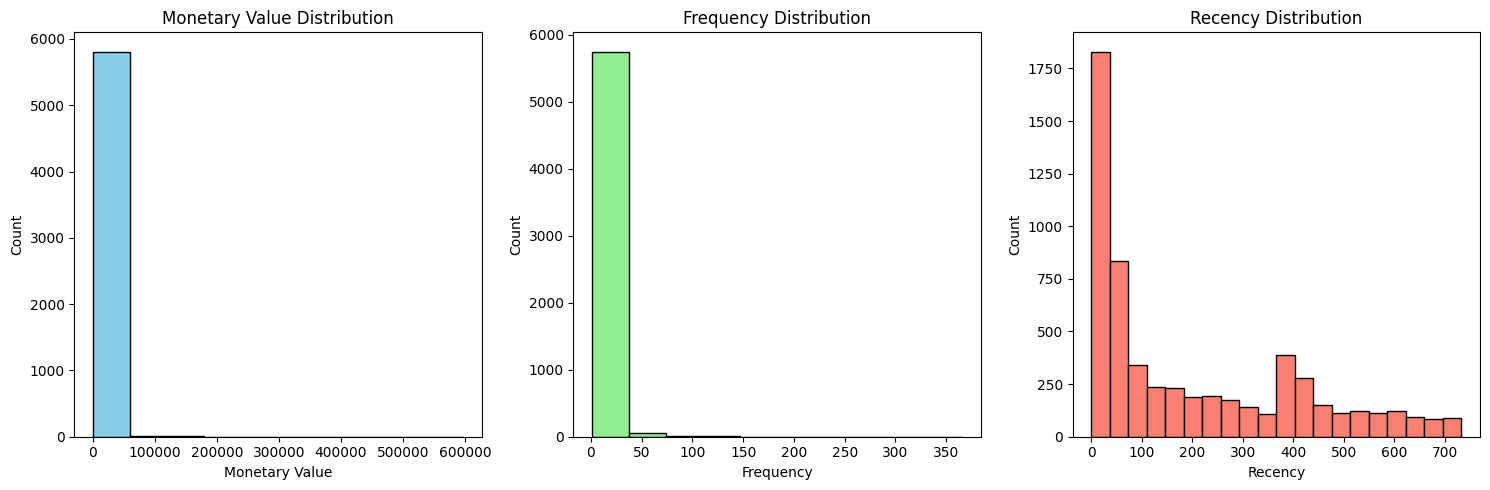

In [109]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')        # Matlplotlib divides the data into 10 intervals.
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

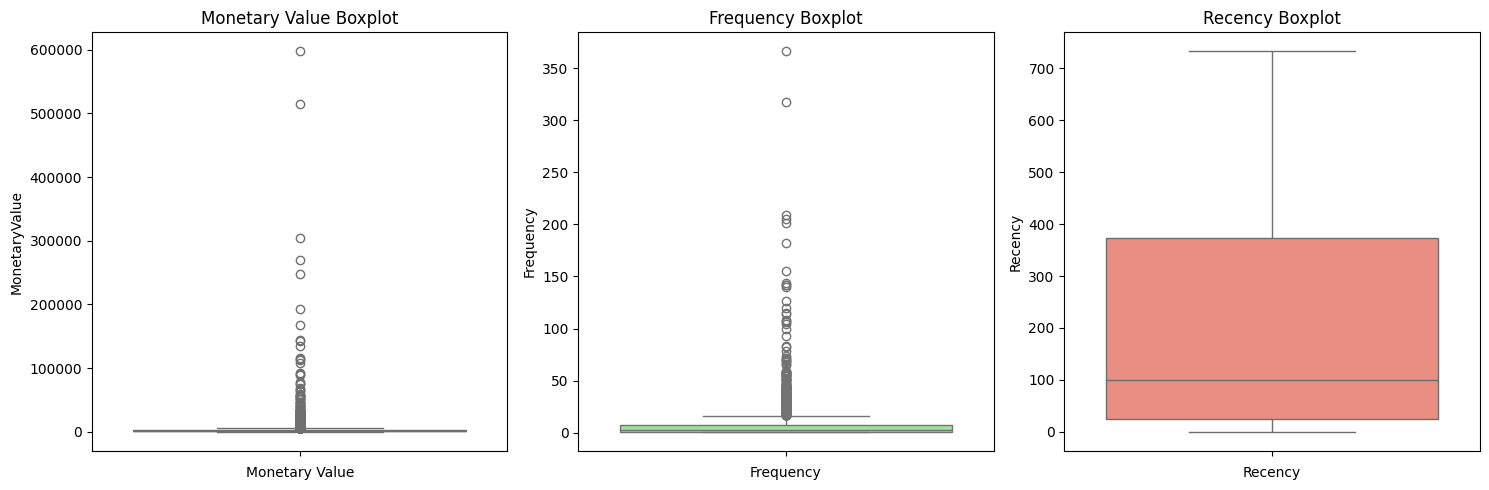

In [110]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')                # Boxplots are used to find outliers.
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

An outlier is a datapoint that differs significantly   from the rest of the values in a dataset.It can show up for different reasons—maybe someone made a mistake while entering data, maybe there was an error in measuring, or it could just be a rare case that naturally stands out. Sometimes, outliers are actually interesting and worth looking into. But they can also mess with analysis by pulling averages or results in the wrong direction.




A box plot (box-and-whisker plot) is a graphical tool that summarizes a dataset using five key statistics:

Minimum

First quartile (Q1, 25th percentile)

Median (Q2, 50th percentile)

Third quartile (Q3, 75th percentile)

Maximum




how to find outliers ?

InterQuartile range=Q3−Q1

Lower Bound:
Q
1
−
1.5
×
IQR


Upper Bound:
Q
3
+
1.5
×
IQR


Any data point below the lower bound or above the upper bound is considered an outlier

In [111]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,622.00,622.00,622.00,622,622.00
mean,15080.54,17697.87,25.61,2011-10-13 19:29:38.392282880,51.26
min,12346.00,5133.49,1.00,2010-01-17 11:33:00,0.00
25%,13579.50,6486.81,12.00,2011-10-17 15:00:00,5.25
50%,14924.00,9001.51,18.00,2011-11-17 11:31:00,17.00
75%,16641.25,14096.42,28.00,2011-11-28 13:38:00,47.00
max,18260.00,597336.11,366.00,2011-12-04 13:00:00,686.00
std,1753.58,40532.34,30.66,NaN,101.28


In [112]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,413.00,413.00,413.00,413,413.00
mean,15360.80,21097.91,34.85,2011-10-31 10:03:27.893462528,33.66
min,12415.00,1820.44,17.00,2010-05-12 16:51:00,0.00
25%,13842.00,6406.08,20.00,2011-11-07 09:40:00,4.00
50%,15298.00,9684.67,25.00,2011-11-22 13:28:00,11.00
75%,16945.00,16644.01,35.00,2011-11-29 15:06:00,27.00
max,18283.00,597336.11,366.00,2011-12-04 13:15:00,570.00
std,1777.39,49072.80,34.56,NaN,71.71


In [113]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5153.00,5153.00,5153.00,5153,5153.00
mean,15344.56,1123.14,3.66,2011-04-29 17:47:23.299049216,218.33
min,12348.00,2.90,1.00,2009-12-01 10:49:00,0.00
25%,13866.00,309.65,1.00,2010-11-10 14:08:00,33.00
50%,15361.00,708.26,3.00,2011-07-17 15:59:00,139.00
75%,16813.00,1563.64,5.00,2011-10-31 15:36:00,388.00
max,18287.00,5130.15,16.00,2011-12-04 12:52:00,733.00
std,1704.36,1118.62,3.18,NaN,209.24


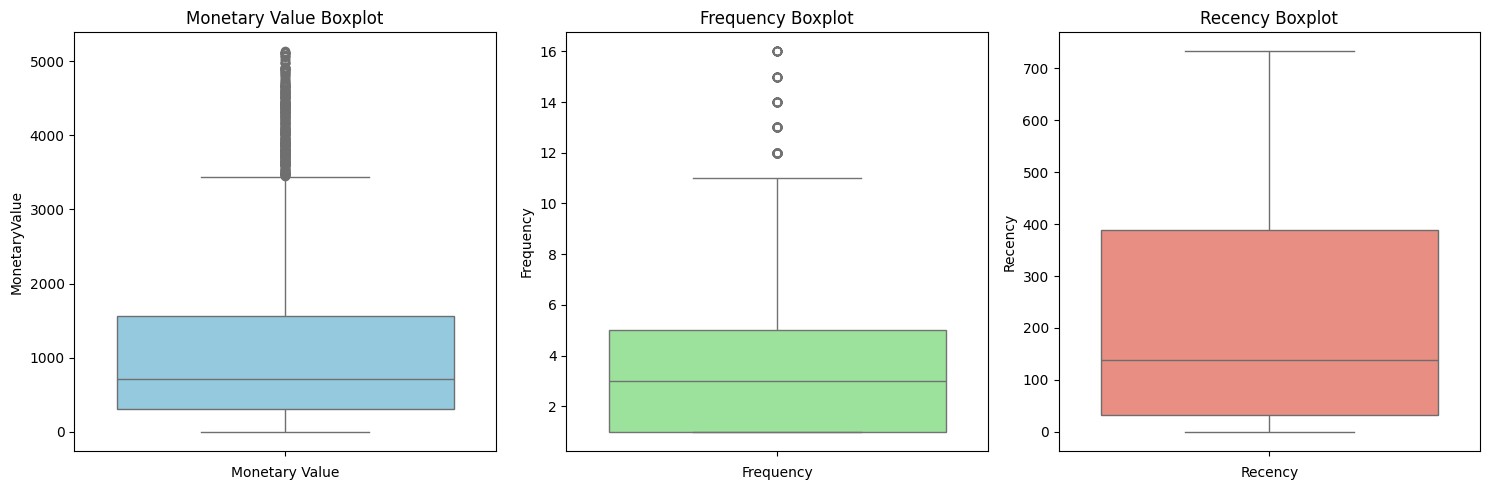

In [114]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

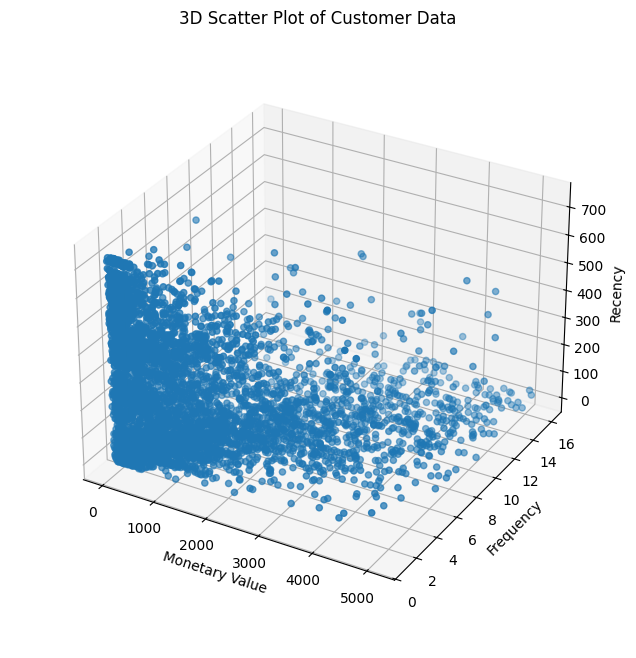

In [115]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")
ax.set_box_aspect(None, zoom=0.9)

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [116]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.47855288,  0.42203609, -0.70894001],
       [ 2.2847909 , -0.20659579, -0.98137472],
       [-0.74092979, -0.83522767,  0.40947618],
       ...,
       [-0.66708136, -0.83522767,  2.08710045],
       [ 0.11023157, -0.52091173,  1.20766208],
       [ 2.69095731,  1.05066797, -0.86666537]])

In [117]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.48,0.42,-0.71
3,2.28,-0.21,-0.98
4,-0.74,-0.84,0.41
5,-0.74,-0.84,0.72
6,0.54,1.68,-0.90
...,...,...,...
5828,-0.84,-0.52,-1.03
5830,-0.64,-0.84,0.99
5831,-0.67,-0.84,2.09
5832,0.11,-0.52,1.21


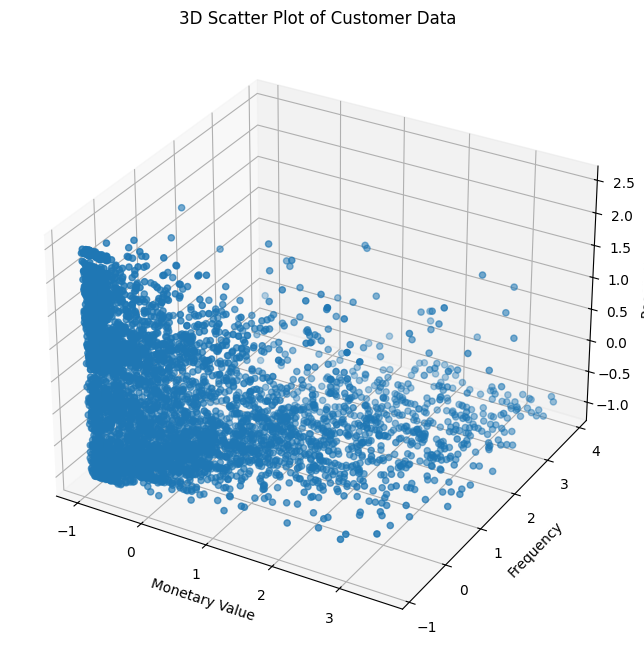

In [118]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

We maintained the shape of the Data ,but the scales are different.

## KMeans Clustering

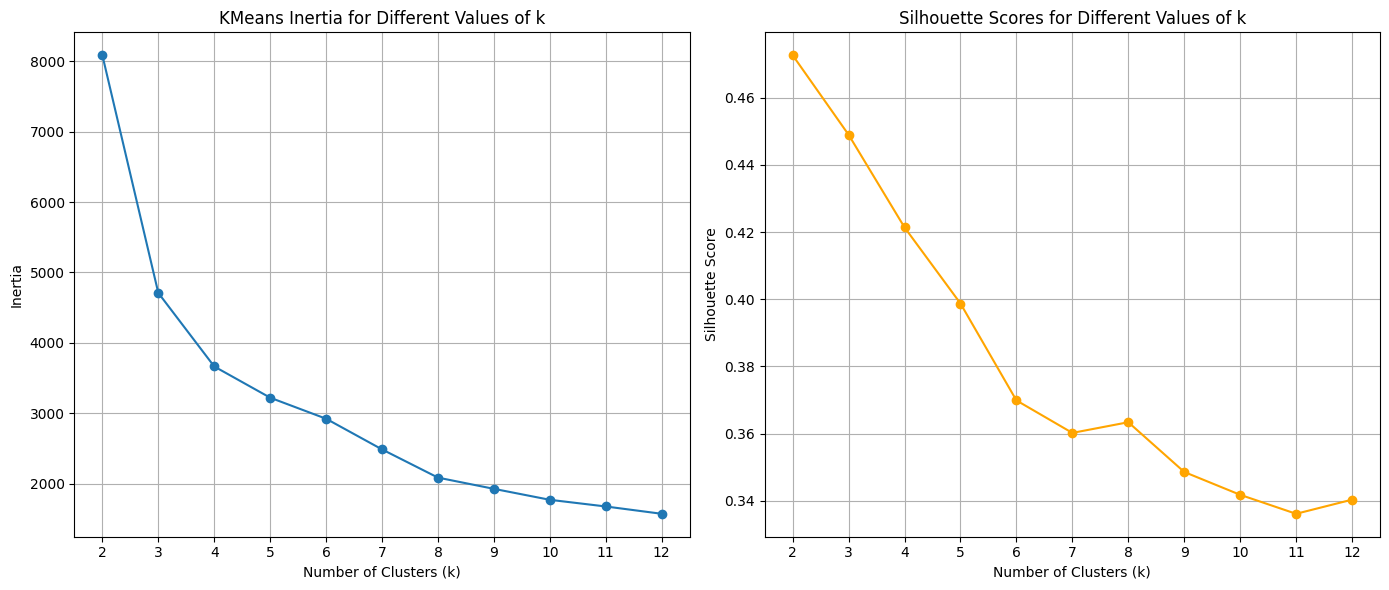

In [119]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

With elbow method we can say either 4 or 5 clusters can be used.so to be sure we use silhouette score.
4 has higher silhouette score so we use K=4.

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

In [120]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 1, 3, ..., 3, 3, 0], dtype=int32)

In [121]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

<ipython-input-121-3577770544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,70,1
3,12349.00,3678.69,3,2011-11-21 09:51:00,13,1
4,12350.00,294.40,1,2011-02-02 16:01:00,304,3
5,12351.00,300.93,1,2010-11-29 15:23:00,369,3
6,12352.00,1729.54,9,2011-11-03 14:37:00,30,1
...,...,...,...,...,...,...
5828,18282.00,178.05,2,2011-12-02 11:43:00,2,2
5830,18284.00,411.68,1,2010-10-04 11:33:00,426,3
5831,18285.00,377.00,1,2010-02-17 10:24:00,655,3
5832,18286.00,1246.43,2,2010-08-20 11:57:00,471,3


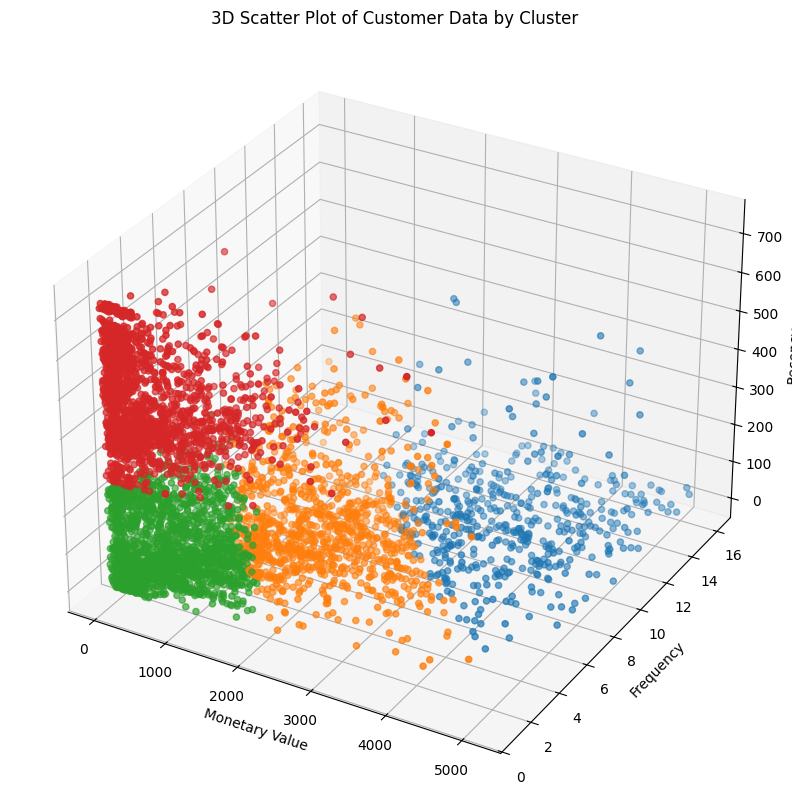

In [122]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

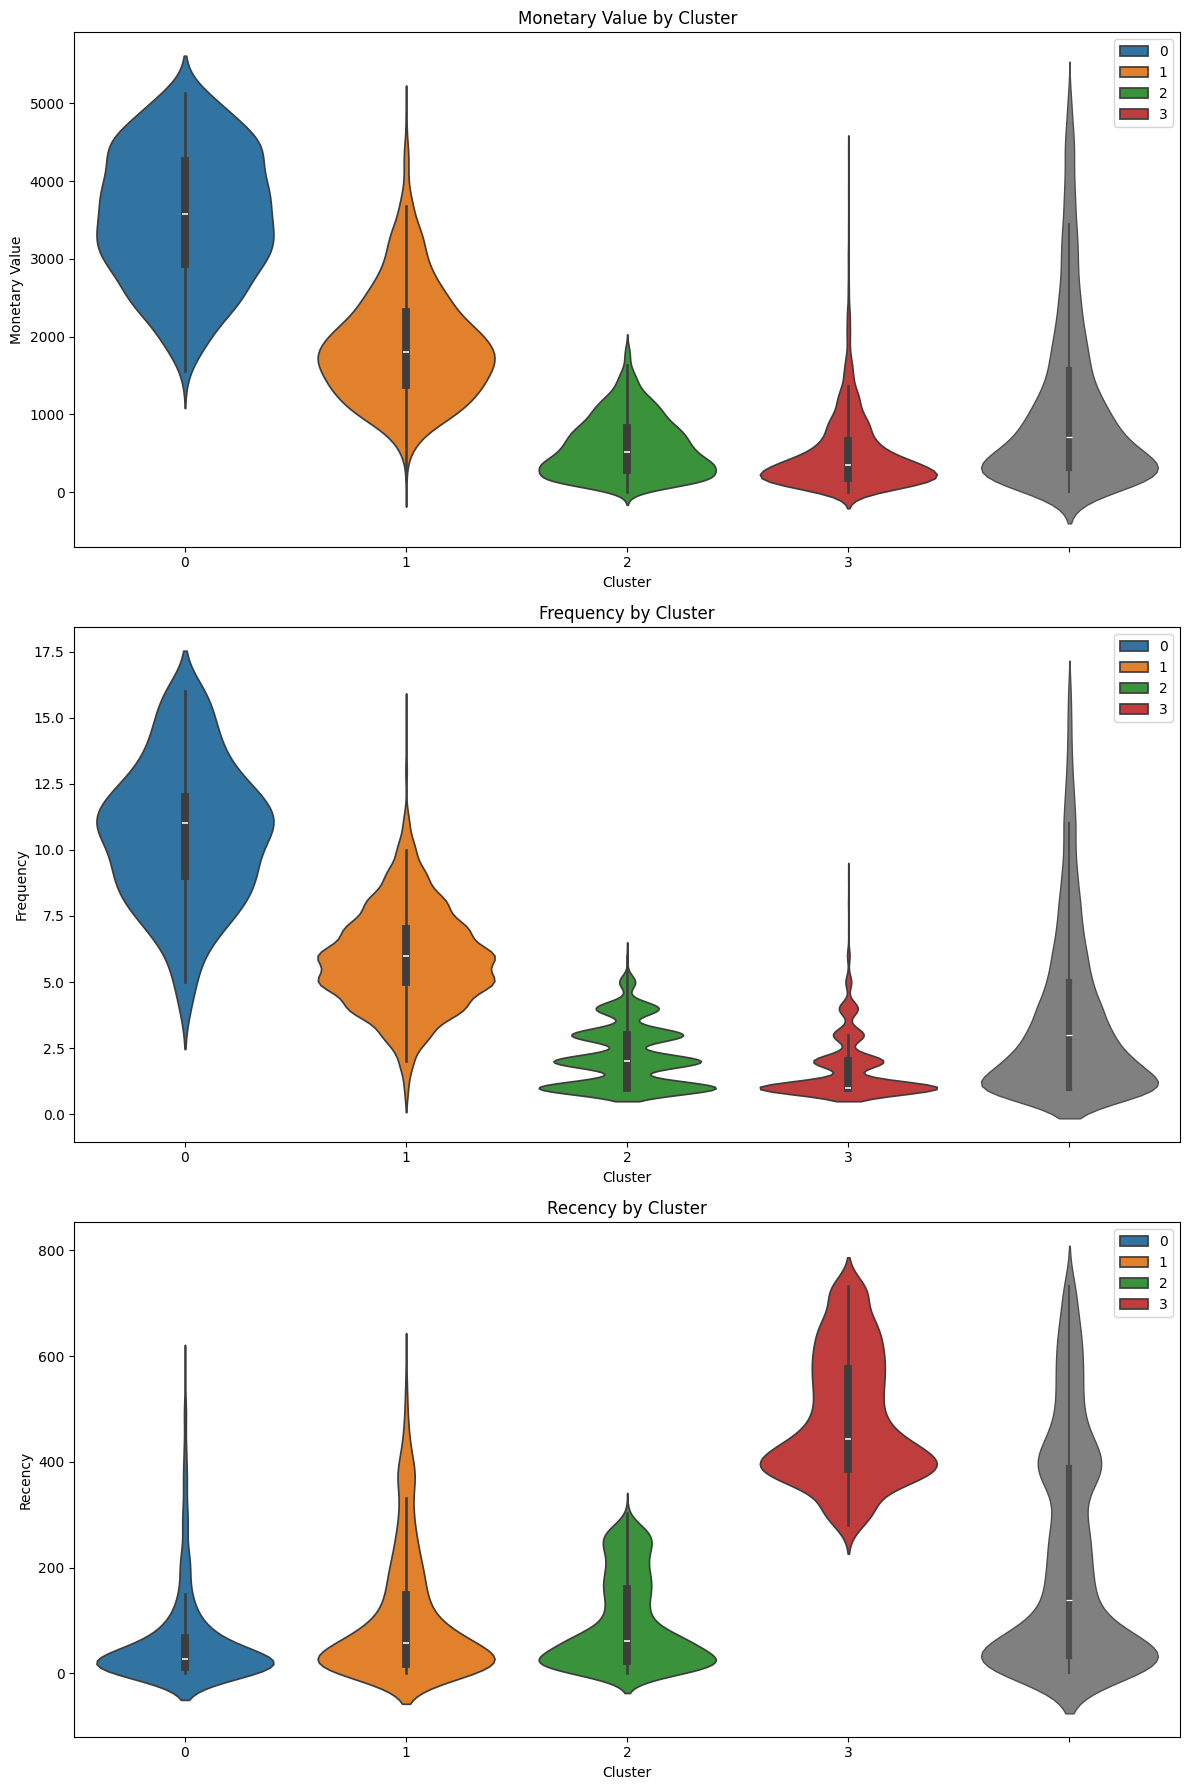

In [123]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

A violin plot is a visually rich chart that blends a box plot and a smoothed density curve, letting you see not just the median and spread of your data, but also the shape—where values cluster, where they thin out, and whether there are multiple peaks

Cluster 0 (Blue): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

Cluster 1 (Orange): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

Cluster 3 (Red): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

Summary of Cluster Names:

* Cluster 0 (Blue): "Reward"
* Cluster 1 (Orange): "Retain"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Re-Engage"

In [124]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77352.96,3,2011-01-18 10:01:00,320,-1
1,12347.00,5408.50,7,2011-10-31 12:25:00,34,-1
10,12356.00,5613.68,6,2011-11-17 08:40:00,17,-1
11,12357.00,17437.66,2,2011-11-06 16:07:00,27,-1
13,12359.00,8935.94,10,2011-10-13 12:47:00,52,-1
...,...,...,...,...,...,...
5772,18226.00,11878.88,26,2011-10-26 13:36:00,38,-3
5775,18229.00,10803.71,28,2011-11-28 09:48:00,6,-3
5777,18231.00,6875.07,28,2011-05-31 14:18:00,186,-3
5791,18245.00,6324.98,20,2011-12-02 14:48:00,1,-3


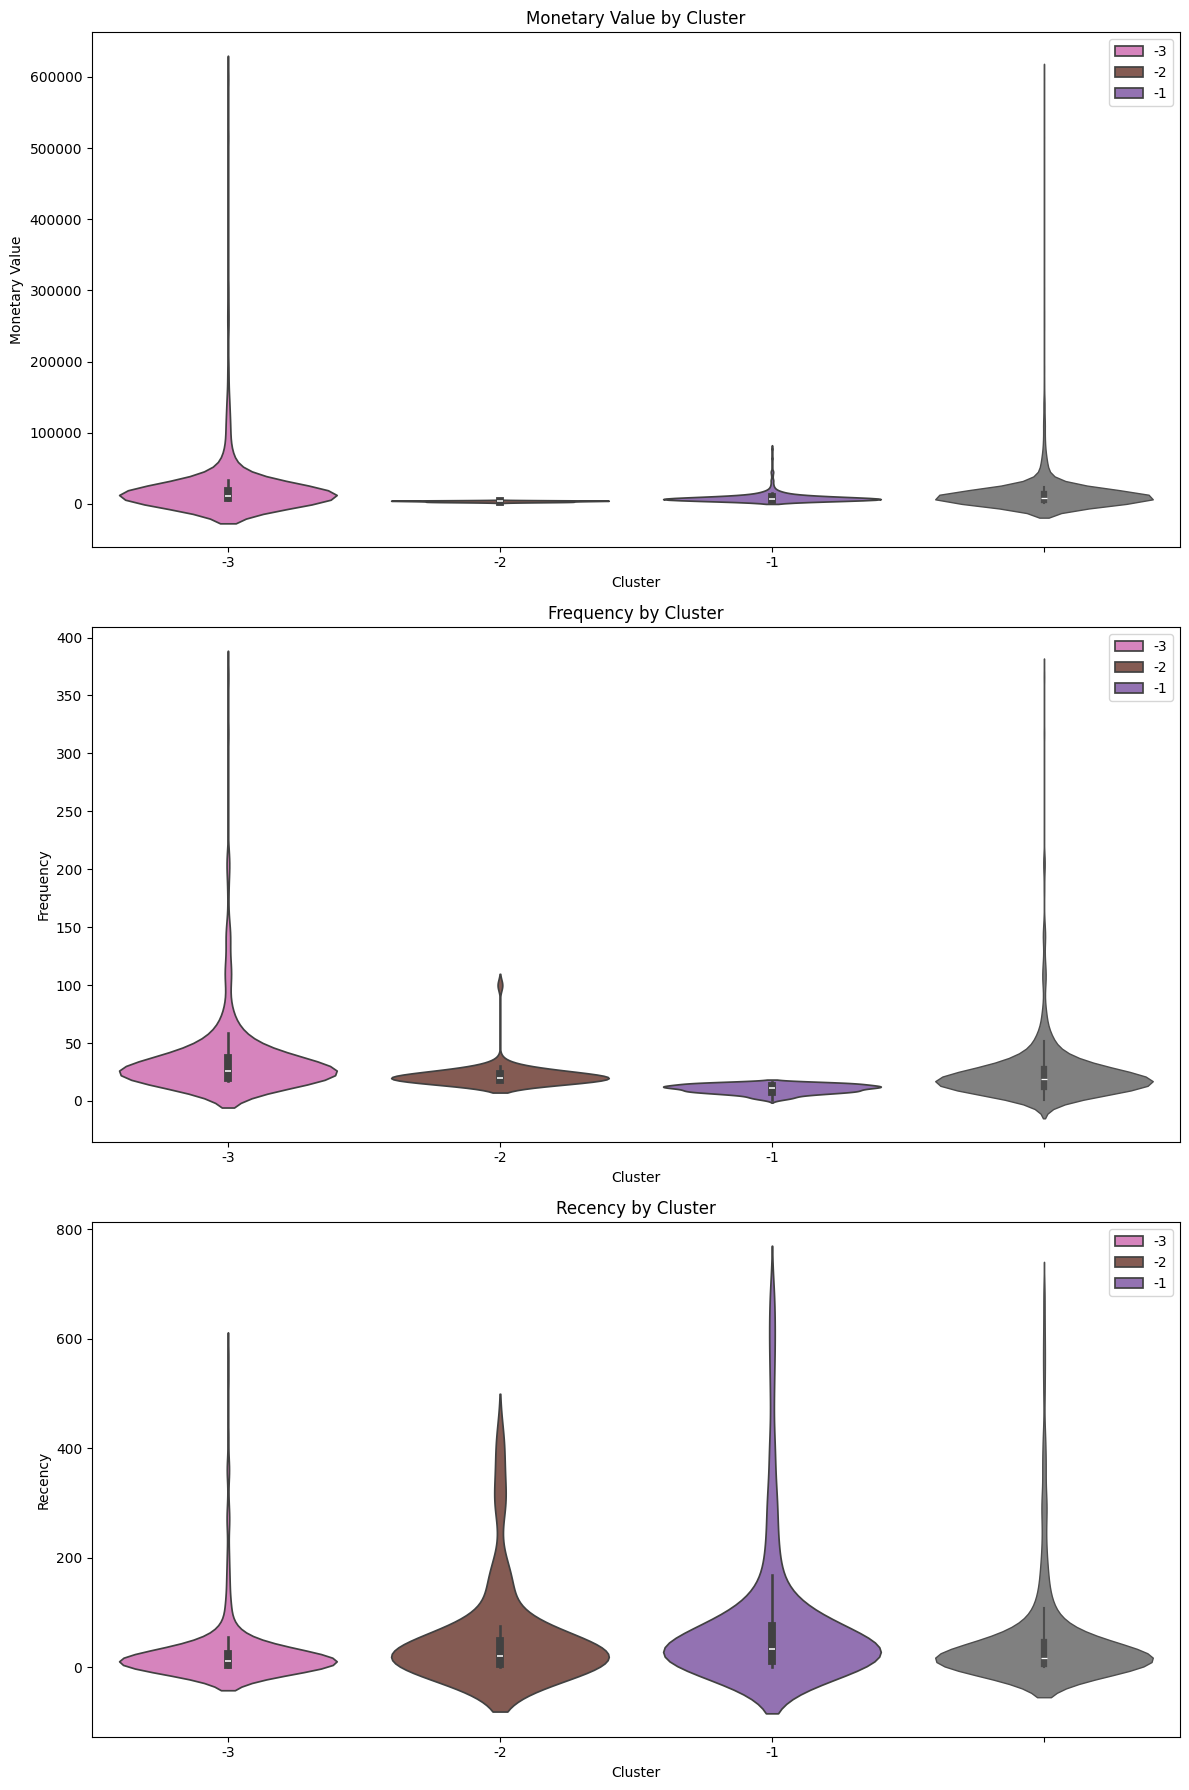

In [125]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [126]:
cluster_labels = {
    0: "Reward",
    1: "Retain",
    2: "NURTURE",
    3:  "Re-Engage",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [127]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,70,1
3,12349.00,3678.69,3,2011-11-21 09:51:00,13,1
4,12350.00,294.40,1,2011-02-02 16:01:00,304,3
5,12351.00,300.93,1,2010-11-29 15:23:00,369,3
6,12352.00,1729.54,9,2011-11-03 14:37:00,30,1
...,...,...,...,...,...,...
5772,18226.00,11878.88,26,2011-10-26 13:36:00,38,-3
5775,18229.00,10803.71,28,2011-11-28 09:48:00,6,-3
5777,18231.00,6875.07,28,2011-05-31 14:18:00,186,-3
5791,18245.00,6324.98,20,2011-12-02 14:48:00,1,-3


In [128]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1658.40,5,2011-09-25 13:13:00,70,1,Retain
3,12349.00,3678.69,3,2011-11-21 09:51:00,13,1,Retain
4,12350.00,294.40,1,2011-02-02 16:01:00,304,3,Re-Engage
5,12351.00,300.93,1,2010-11-29 15:23:00,369,3,Re-Engage
6,12352.00,1729.54,9,2011-11-03 14:37:00,30,1,Retain
...,...,...,...,...,...,...,...
5772,18226.00,11878.88,26,2011-10-26 13:36:00,38,-3,DELIGHT
5775,18229.00,10803.71,28,2011-11-28 09:48:00,6,-3,DELIGHT
5777,18231.00,6875.07,28,2011-05-31 14:18:00,186,-3,DELIGHT
5791,18245.00,6324.98,20,2011-12-02 14:48:00,1,-3,DELIGHT
